In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import math
import pandas as pd
import mplhep as hep

hep.style.use("ALICE")

In [2]:
def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

In [3]:
df_v2_jpsi_vs_pt_10_50_rebin = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/v2_vs_pt_10_50_rebin.txt', sep=' ')
pt_min_rebin = df_v2_jpsi_vs_pt_10_50_rebin["x_min"]
pt_max_rebin = df_v2_jpsi_vs_pt_10_50_rebin["x_max"]
pt_rebin = (pt_min_rebin + pt_max_rebin) / 2.
err_pt_rebin = (pt_max_rebin - pt_min_rebin) / 2.
v2_jpsi_vs_pt_10_50_rebin = df_v2_jpsi_vs_pt_10_50_rebin["val"]
stat_v2_jpsi_vs_pt_10_50_rebin = df_v2_jpsi_vs_pt_10_50_rebin["stat"]
syst_v2_jpsi_vs_pt_10_50_rebin = df_v2_jpsi_vs_pt_10_50_rebin["syst"]

df_v2_jpsi_vs_pt_10_50_preview = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/v2_vs_pt_10_50_preview.txt', sep=' ')
pt_min_preview = df_v2_jpsi_vs_pt_10_50_preview["x_min"]
pt_max_preview = df_v2_jpsi_vs_pt_10_50_preview["x_max"]
pt_preview = (pt_min_preview + pt_max_preview) / 2.
err_pt_preview = (pt_max_preview - pt_min_preview) / 2.
v2_jpsi_vs_pt_10_50_preview = df_v2_jpsi_vs_pt_10_50_preview["val"]
stat_v2_jpsi_vs_pt_10_50_preview = df_v2_jpsi_vs_pt_10_50_preview["stat"]
syst_v2_jpsi_vs_pt_10_50_preview = df_v2_jpsi_vs_pt_10_50_preview["syst"]

###############
# Final results
df_v2_jpsi_vs_pt_10_50_final_tmp = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/v2_vs_pt_10_50_final_tmp.txt', sep=' ')
pt_min_final_tmp = df_v2_jpsi_vs_pt_10_50_final_tmp["x_min"]
pt_max_final_tmp = df_v2_jpsi_vs_pt_10_50_final_tmp["x_max"]
pt_final_tmp = (pt_min_final_tmp + pt_max_final_tmp) / 2.
err_pt_final_tmp = (pt_max_final_tmp - pt_min_final_tmp) / 2.
v2_jpsi_vs_pt_10_50_final_tmp = df_v2_jpsi_vs_pt_10_50_final_tmp["val"]
stat_v2_jpsi_vs_pt_10_50_final_tmp = df_v2_jpsi_vs_pt_10_50_final_tmp["stat"]

## Systematic on signal extraction
syst_sig_extr_v2_jpsi_vs_pt_10_50_final_tmp = df_v2_jpsi_vs_pt_10_50_final_tmp["syst"]

## Systematic on event mixing background
df_v2_jpsi_vs_pt_10_50_final_tmp_syst_em_bkg = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/v2_vs_pt_10_50_final_tmp_syst_em_bkg.txt', sep=' ')
syst_em_bkg_v2_jpsi_vs_pt_10_50_final_tmp = df_v2_jpsi_vs_pt_10_50_final_tmp_syst_em_bkg["syst"]

syst_v2_jpsi_vs_pt_10_50_final_tmp = np.sqrt(syst_sig_extr_v2_jpsi_vs_pt_10_50_final_tmp**2 + syst_em_bkg_v2_jpsi_vs_pt_10_50_final_tmp**2)


# PF approval results
dfV2JpsiVsPtCentr1050 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/v2_vs_pt_10_50_final.txt', sep=' ')
ptMin = dfV2JpsiVsPtCentr1050["x_min"]
ptMax = dfV2JpsiVsPtCentr1050["x_max"]
ptCentr = (ptMin + ptMax) / 2.
errPtCentr = (ptMax - ptMin) / 2.
v2JpsiVsPtCentr1050 = dfV2JpsiVsPtCentr1050["val"]
statV2JpsiVsPtCentr1050 = dfV2JpsiVsPtCentr1050["stat"]
systSigEntrV2JpsiVsPtCentr1050 = dfV2JpsiVsPtCentr1050["syst"]
systResoV2JpsiVsPtCentr1050 = 0.01 * v2JpsiVsPtCentr1050
systV2JpsiVsPtCentr1050 = np.sqrt(systSigEntrV2JpsiVsPtCentr1050**2 + systResoV2JpsiVsPtCentr1050**2)

###############

df_v2_jpsi_vs_pt_10_50 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/v2_vs_pt_10_50.txt', sep=' ')
pt_min = df_v2_jpsi_vs_pt_10_50["x_min"]
pt_max = df_v2_jpsi_vs_pt_10_50["x_max"]
pt = (pt_min + pt_max) / 2.
err_pt = (pt_max - pt_min) / 2.
v2_jpsi_vs_pt_10_50 = df_v2_jpsi_vs_pt_10_50["val"]
stat_v2_jpsi_vs_pt_10_50 = df_v2_jpsi_vs_pt_10_50["stat"]
syst_v2_jpsi_vs_pt_10_50 = df_v2_jpsi_vs_pt_10_50["syst"]

df_v2_jpsi_run2_vs_pt_10_30 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/run2_v2_vs_pt_10_30.txt', sep=' ')
pt_run2 = df_v2_jpsi_run2_vs_pt_10_30["x"]
err_pt_run2 = df_v2_jpsi_run2_vs_pt_10_30["ex"]
v2_jpsi_run2_vs_pt_10_30 = df_v2_jpsi_run2_vs_pt_10_30["val"]
stat_v2_jpsi_run2_vs_pt_10_30 = df_v2_jpsi_run2_vs_pt_10_30["stat"]
syst_v2_jpsi_run2_vs_pt_10_30 = df_v2_jpsi_run2_vs_pt_10_30["syst"]

df_v2_jpsi_run2_vs_pt_30_50 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/run2_v2_vs_pt_30_50.txt', sep=' ')
v2_jpsi_run2_vs_pt_30_50 = df_v2_jpsi_run2_vs_pt_30_50["val"]
stat_v2_jpsi_run2_vs_pt_30_50 = df_v2_jpsi_run2_vs_pt_30_50["stat"]
syst_v2_jpsi_run2_vs_pt_30_50 = df_v2_jpsi_run2_vs_pt_30_50["syst"]

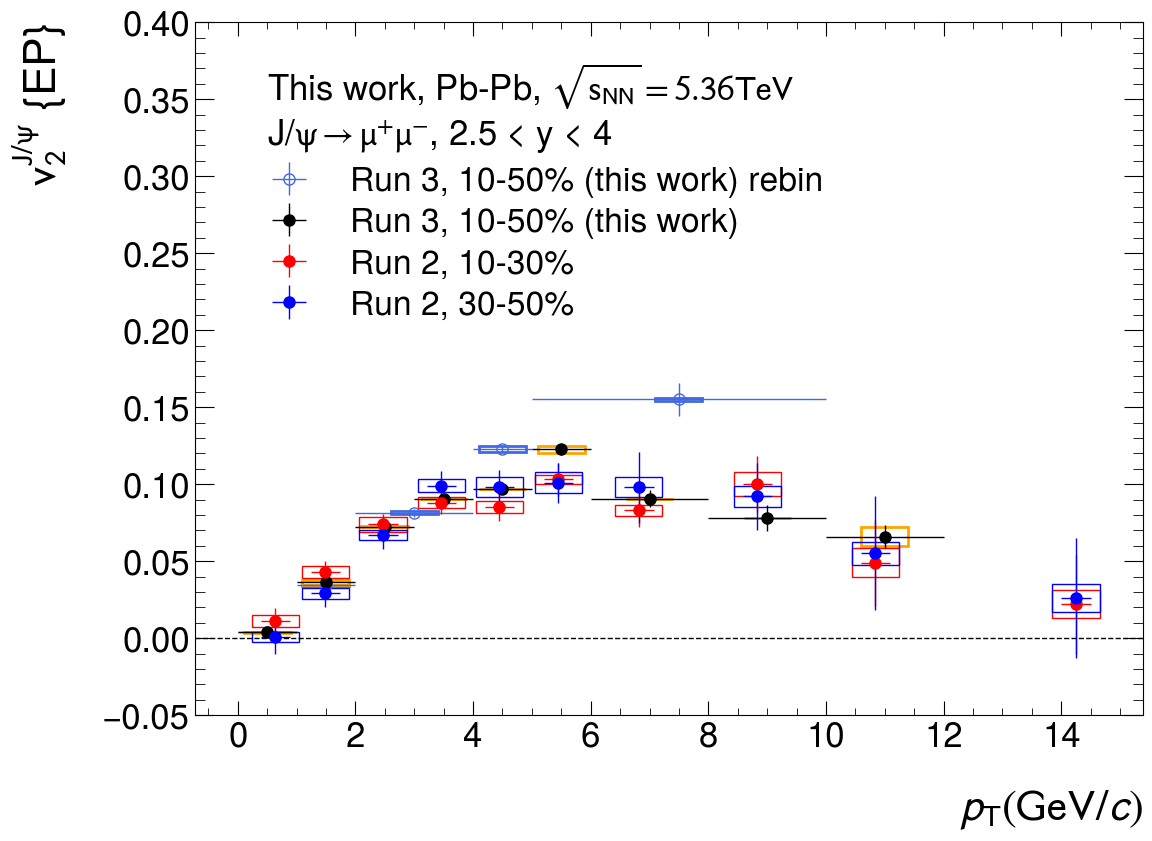

In [4]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt, 0.4, v2_jpsi_vs_pt_10_50, syst_v2_jpsi_vs_pt_10_50, ax, 'royalblue', 2)
plot_syst(pt_rebin, 0.4, v2_jpsi_vs_pt_10_50_rebin, syst_v2_jpsi_vs_pt_10_50_rebin, ax, 'orange', 2)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_10_30, syst_v2_jpsi_run2_vs_pt_10_30, ax, 'red', 1)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_30_50, syst_v2_jpsi_run2_vs_pt_30_50, ax, 'blue', 1)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.ylim(-0.05, 0.40)
plt.errorbar(pt, v2_jpsi_vs_pt_10_50, xerr=err_pt, yerr=stat_v2_jpsi_vs_pt_10_50, label="Run 3, 10-50% (this work) rebin", fmt='o', color='royalblue', ecolor='royalblue', mfc='none')
plt.errorbar(pt_rebin, v2_jpsi_vs_pt_10_50_rebin, xerr=err_pt_rebin, yerr=stat_v2_jpsi_vs_pt_10_50_rebin, label="Run 3, 10-50% (this work)", fmt='o', color='black', ecolor='black')
#plt.errorbar(pt, v2_jpsi_vs_pt_10_50, yerr=syst_v2_jpsi_vs_pt_10_50, label="syst. error", fmt='o', color='black', ecolor='red', alpha=0.5, elinewidth=50, capsize=0)
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_10_30, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_10_30, label="Run 2, 10-30%", fmt='o', color='red', ecolor='red')
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_30_50, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_30_50, label="Run 2, 30-50%", fmt='o', color='blue', ecolor='blue')
plt.legend(loc=(0.05, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
plt.show()

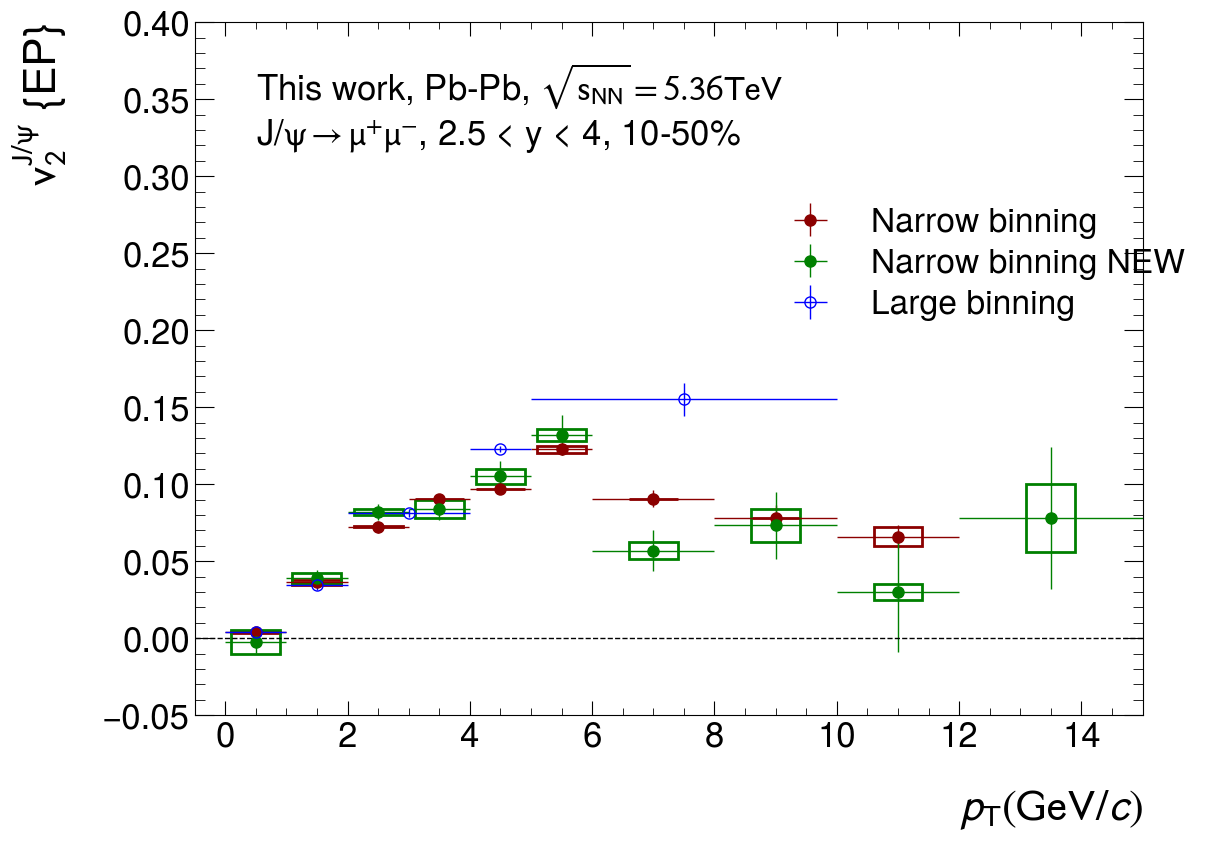

In [5]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt_rebin, 0.4, v2_jpsi_vs_pt_10_50_rebin, syst_v2_jpsi_vs_pt_10_50_rebin, ax, 'darkred', 2)
plot_syst(pt_final_tmp, 0.4, v2_jpsi_vs_pt_10_50_final_tmp, syst_v2_jpsi_vs_pt_10_50_final_tmp, ax, 'green', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 15)
plt.ylim(-0.05, 0.40)
plt.errorbar(pt_rebin, v2_jpsi_vs_pt_10_50_rebin, xerr=err_pt_rebin, yerr=stat_v2_jpsi_vs_pt_10_50_rebin, label="Narrow binning", fmt='o', color='darkred', ecolor='darkred')
plt.errorbar(pt_final_tmp, v2_jpsi_vs_pt_10_50_final_tmp, xerr=err_pt_final_tmp, yerr=stat_v2_jpsi_vs_pt_10_50_final_tmp, label="Narrow binning NEW", fmt='o', color='green', ecolor='green')
plt.errorbar(pt, v2_jpsi_vs_pt_10_50, xerr=err_pt, yerr=stat_v2_jpsi_vs_pt_10_50, label="Large binning", fmt='o', color='blue', ecolor='blue', mfc='none')
plt.legend(loc=(0.6, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 10-50%', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
plt.show()

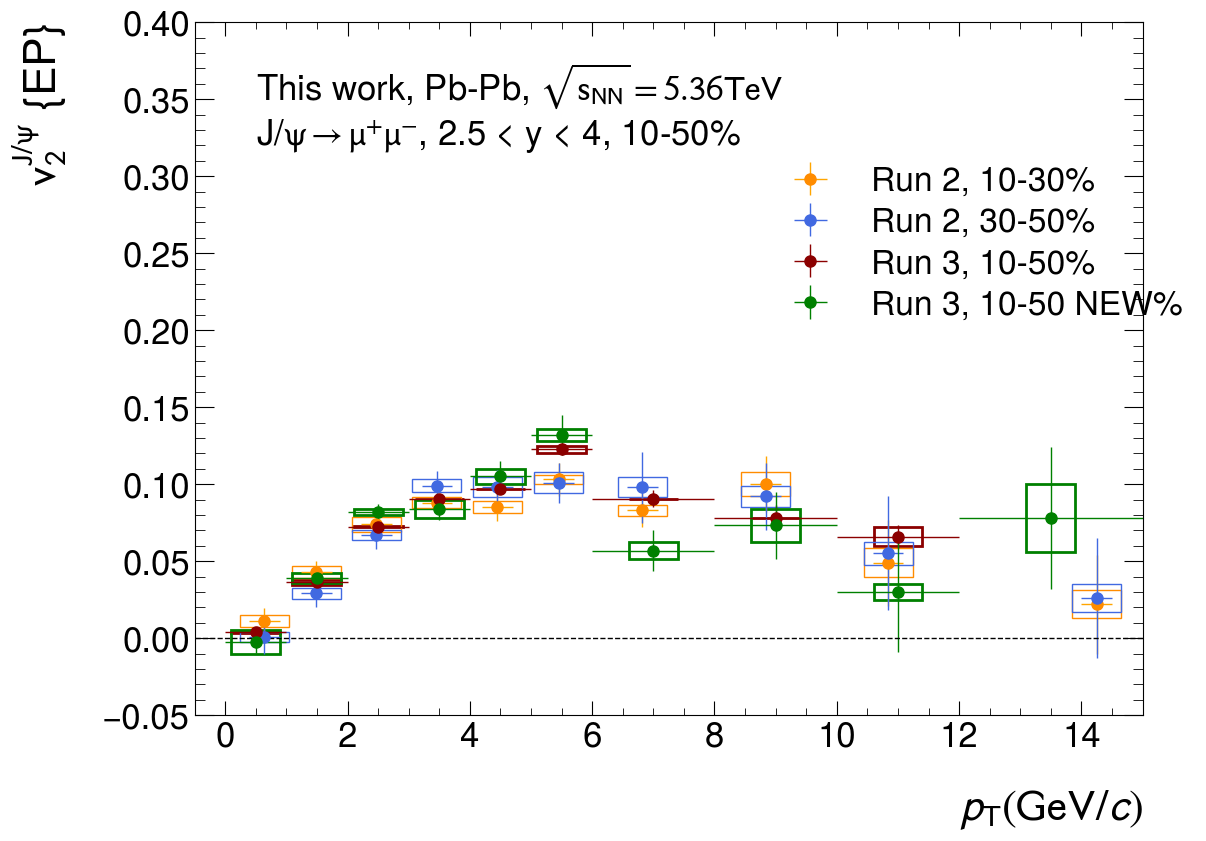

In [6]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt_rebin, 0.4, v2_jpsi_vs_pt_10_50_rebin, syst_v2_jpsi_vs_pt_10_50_rebin, ax, 'darkred', 2)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_10_30, syst_v2_jpsi_run2_vs_pt_10_30, ax, 'darkorange', 1)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_30_50, syst_v2_jpsi_run2_vs_pt_30_50, ax, 'royalblue', 1)
plot_syst(pt_final_tmp, 0.4, v2_jpsi_vs_pt_10_50_final_tmp, syst_v2_jpsi_vs_pt_10_50_final_tmp, ax, 'green', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 15)
plt.ylim(-0.05, 0.40)
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_10_30, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_10_30, label="Run 2, 10-30%", fmt='o', color='darkorange', ecolor='orange')
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_30_50, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_30_50, label="Run 2, 30-50%", fmt='o', color='royalblue', ecolor='royalblue')
plt.errorbar(pt_rebin, v2_jpsi_vs_pt_10_50_rebin, xerr=err_pt_rebin, yerr=stat_v2_jpsi_vs_pt_10_50_rebin, label="Run 3, 10-50%", fmt='o', color='darkred', ecolor='darkred')
plt.errorbar(pt_final_tmp, v2_jpsi_vs_pt_10_50_final_tmp, xerr=err_pt_final_tmp, yerr=stat_v2_jpsi_vs_pt_10_50_final_tmp, label="Run 3, 10-50 NEW%", fmt='o', color='green', ecolor='green')
plt.legend(loc=(0.6, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 10-50%', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
plt.show()

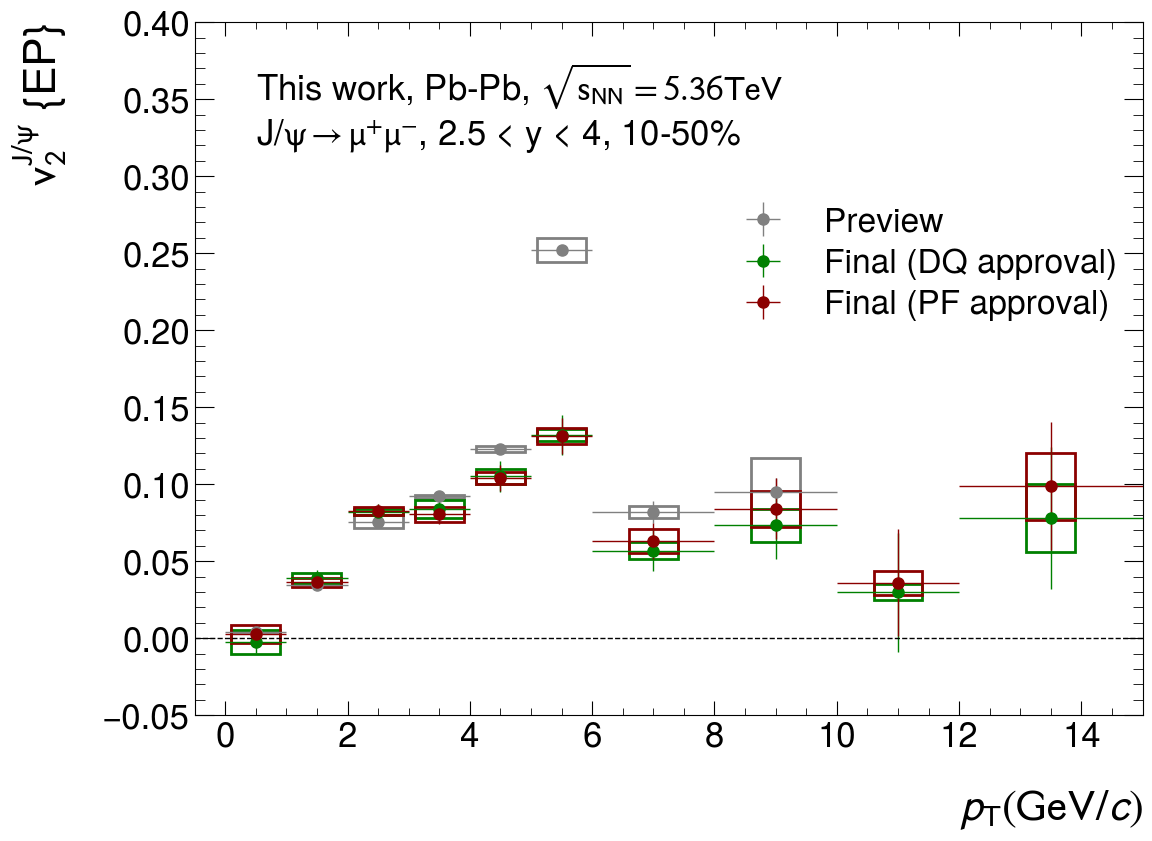

In [7]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt_preview, 0.4, v2_jpsi_vs_pt_10_50_preview, syst_v2_jpsi_vs_pt_10_50_preview, ax, 'gray', 2)
plot_syst(pt_final_tmp, 0.4, v2_jpsi_vs_pt_10_50_final_tmp, syst_v2_jpsi_vs_pt_10_50_final_tmp, ax, 'green', 2)
plot_syst(ptCentr, 0.4, v2JpsiVsPtCentr1050, systV2JpsiVsPtCentr1050, ax, 'darkred', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 15)
plt.ylim(-0.05, 0.40)
plt.errorbar(pt_preview, v2_jpsi_vs_pt_10_50_preview, xerr=err_pt_preview, yerr=stat_v2_jpsi_vs_pt_10_50_preview, label="Preview", fmt='o', color='gray', ecolor='gray')
plt.errorbar(pt_final_tmp, v2_jpsi_vs_pt_10_50_final_tmp, xerr=err_pt_final_tmp, yerr=stat_v2_jpsi_vs_pt_10_50_final_tmp, label="Final (DQ approval)", fmt='o', color='green', ecolor='green')
plt.errorbar(ptCentr, v2JpsiVsPtCentr1050, xerr=errPtCentr, yerr=statV2JpsiVsPtCentr1050, label="Final (PF approval)", fmt='o', color='darkred', ecolor='darkred')
plt.legend(loc=(0.55, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 10-50%', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
plt.show()

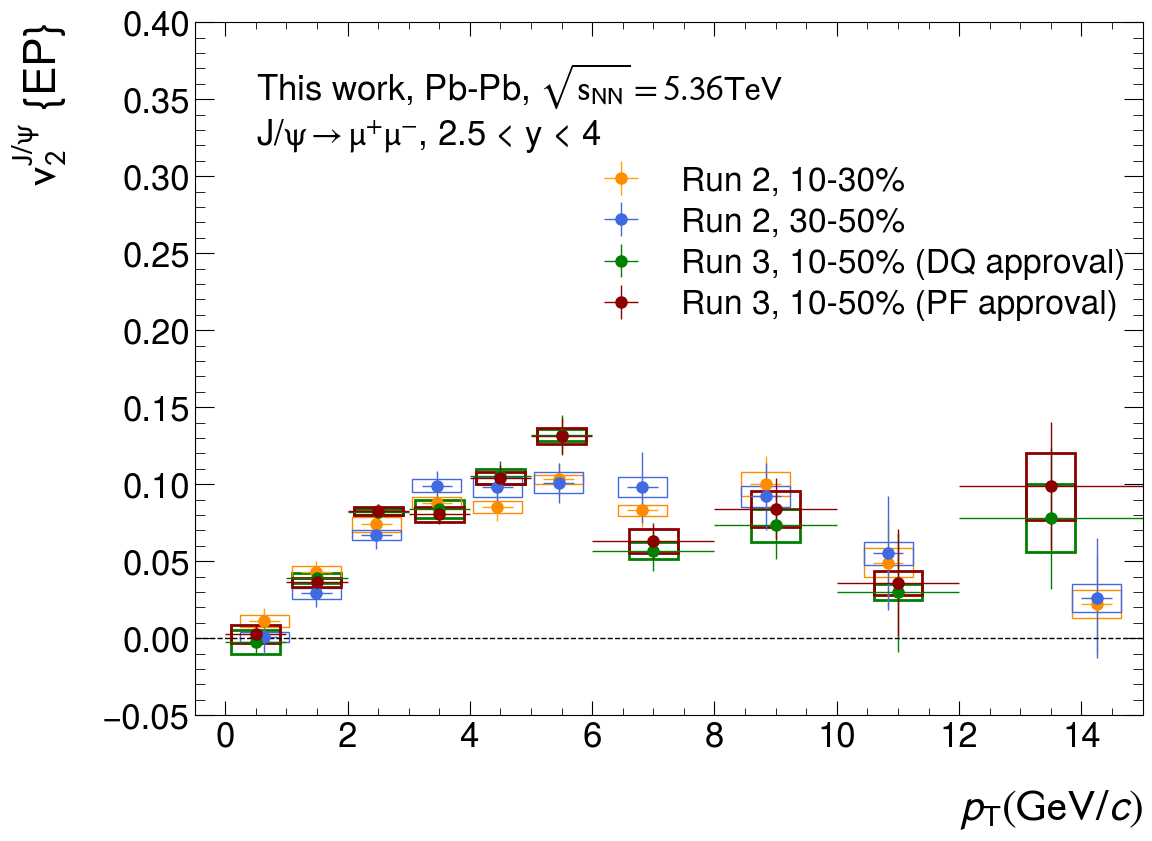

In [8]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt_final_tmp, 0.4, v2_jpsi_vs_pt_10_50_final_tmp, syst_v2_jpsi_vs_pt_10_50_final_tmp, ax, 'green', 2)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_10_30, syst_v2_jpsi_run2_vs_pt_10_30, ax, 'darkorange', 1)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_30_50, syst_v2_jpsi_run2_vs_pt_30_50, ax, 'royalblue', 1)
plot_syst(ptCentr, 0.4, v2JpsiVsPtCentr1050, systV2JpsiVsPtCentr1050, ax, 'darkred', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 15)
plt.ylim(-0.05, 0.40)
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_10_30, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_10_30, label="Run 2, 10-30%", fmt='o', color='darkorange', ecolor='orange')
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_30_50, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_30_50, label="Run 2, 30-50%", fmt='o', color='royalblue', ecolor='royalblue')
plt.errorbar(pt_final_tmp, v2_jpsi_vs_pt_10_50_final_tmp, xerr=err_pt_final_tmp, yerr=stat_v2_jpsi_vs_pt_10_50_final_tmp, label="Run 3, 10-50% (DQ approval)", fmt='o', color='green', ecolor='green')
plt.errorbar(ptCentr, v2JpsiVsPtCentr1050, xerr=errPtCentr, yerr=statV2JpsiVsPtCentr1050, label="Run 3, 10-50% (PF approval)", fmt='o', color='darkred', ecolor='darkred')
plt.legend(loc=(0.40, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
plt.show()

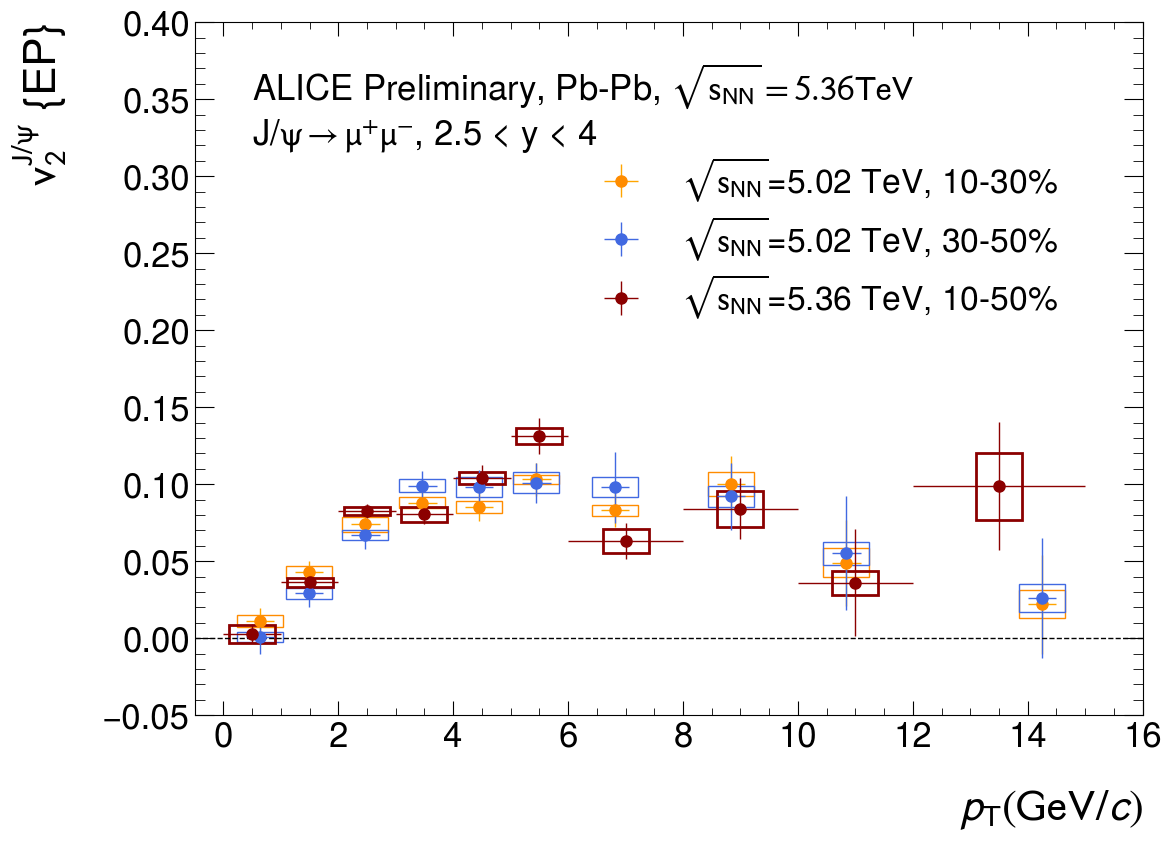

In [9]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_10_30, syst_v2_jpsi_run2_vs_pt_10_30, ax, 'darkorange', 1)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_30_50, syst_v2_jpsi_run2_vs_pt_30_50, ax, 'royalblue', 1)
plot_syst(ptCentr, 0.4, v2JpsiVsPtCentr1050, systV2JpsiVsPtCentr1050, ax, 'darkred', 2)

# Add a bot for the 1% systematic due to EP resolution
#box = plt.Rectangle((15.7,-0.01), 0.3, 0.02, color='darkred')

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 16)
plt.ylim(-0.05, 0.40)
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_10_30, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_10_30, label=r'$\sqrt{s_{\rm{NN}}}$=5.02 TeV, 10-30%', fmt='o', color='darkorange', ecolor='orange')
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_30_50, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_30_50, label=r'$\sqrt{s_{\rm{NN}}}$=5.02 TeV, 30-50%', fmt='o', color='royalblue', ecolor='royalblue')
plt.errorbar(ptCentr, v2JpsiVsPtCentr1050, xerr=errPtCentr, yerr=statV2JpsiVsPtCentr1050, label=r'$\sqrt{s_{\rm{NN}}}$=5.36 TeV, 10-50%', fmt='o', color='darkred', ecolor='darkred')
plt.legend(loc=(0.40, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'ALICE Preliminary, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
#plt.gca().add_patch(box)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/v2_jpsi_vs_pt_centr_10_50_run2_vs_run3.pdf", format="pdf", bbox_inches="tight")
plt.show()

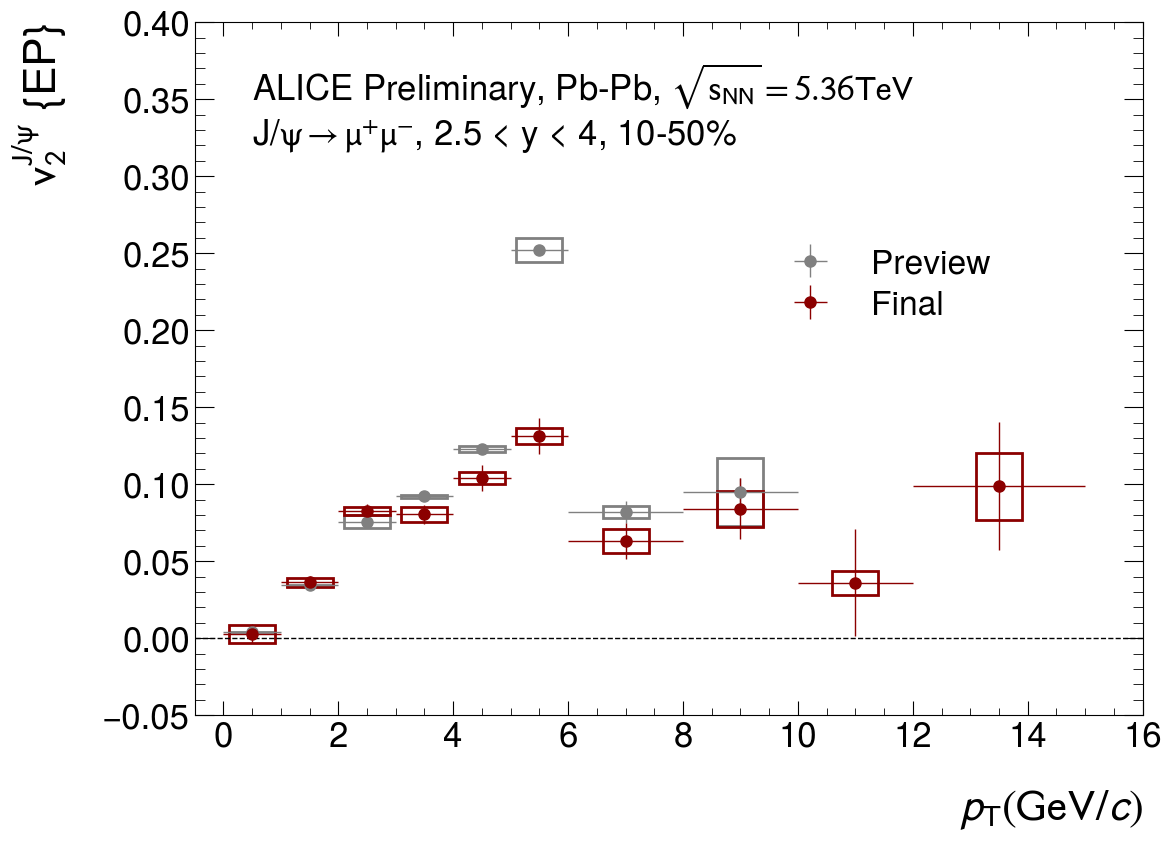

In [10]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt_preview, 0.4, v2_jpsi_vs_pt_10_50_preview, syst_v2_jpsi_vs_pt_10_50_preview, ax, 'gray', 2)
plot_syst(ptCentr, 0.4, v2JpsiVsPtCentr1050, systV2JpsiVsPtCentr1050, ax, 'darkred', 2)

# Add a bot for the 1% systematic due to EP resolution
#box = plt.Rectangle((15.7,-0.01), 0.3, 0.02, color='darkred')

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 16)
plt.ylim(-0.05, 0.40)
plt.errorbar(pt_preview, v2_jpsi_vs_pt_10_50_preview, xerr=err_pt_preview, yerr=stat_v2_jpsi_vs_pt_10_50_preview, label="Preview", fmt='o', color='gray', ecolor='gray')
plt.errorbar(ptCentr, v2JpsiVsPtCentr1050, xerr=errPtCentr, yerr=statV2JpsiVsPtCentr1050, label="Final", fmt='o', color='darkred', ecolor='darkred')
plt.legend(loc=(0.60, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'ALICE Preliminary, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 10-50%', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
#plt.gca().add_patch(box)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/v2_jpsi_vs_pt_centr_10_50_preview_vs_final_results.pdf", format="pdf", bbox_inches="tight")
plt.show()

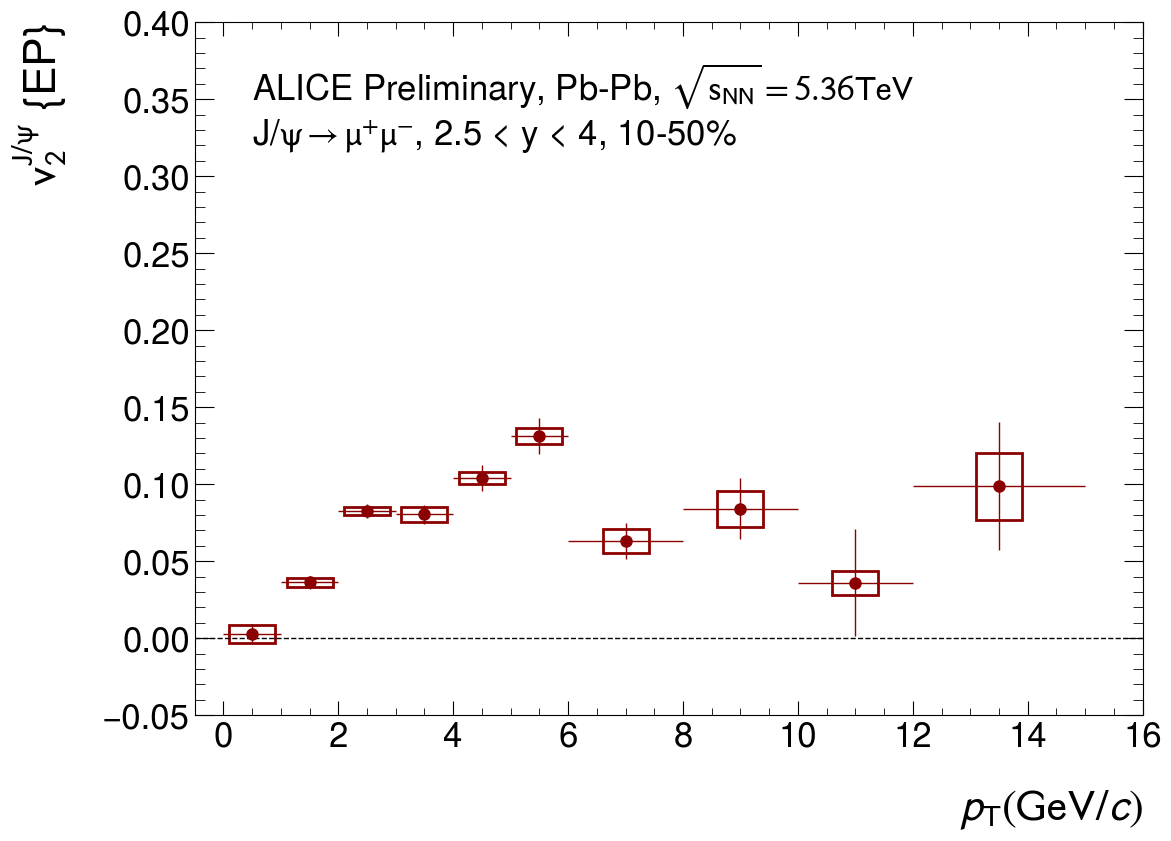

In [11]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(ptCentr, 0.4, v2JpsiVsPtCentr1050, systV2JpsiVsPtCentr1050, ax, 'darkred', 2)

# Add a bot for the 1% systematic due to EP resolution
#box = plt.Rectangle((15.7,-0.01), 0.3, 0.02, color='darkred')


plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 16)
plt.ylim(-0.05, 0.40)
plt.errorbar(ptCentr, v2JpsiVsPtCentr1050, xerr=errPtCentr, yerr=statV2JpsiVsPtCentr1050, label="Final", fmt='o', color='darkred', ecolor='darkred')
plt.text(0.5, 0.35, r'ALICE Preliminary, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 10-50%', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
#plt.gca().add_patch(box)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/v2_jpsi_vs_pt_centr_10_50_final_result.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [12]:
print("--- J/psi v2 extraction vs pt in 10-50% ---")
relSystReso = 0.01 # 1% systematic on the EP resolution
for id, val in enumerate(v2JpsiVsPtCentr1050):
    sigCentr1050 = v2JpsiVsPtCentr1050[id]
    statCentr1050 = statV2JpsiVsPtCentr1050[id]
    systV2ExtrCentr1050 = systSigEntrV2JpsiVsPtCentr1050[id]
    systResoCentr1050 = systResoV2JpsiVsPtCentr1050[id]
    systCentr1050 = systV2JpsiVsPtCentr1050[id]

    output = (
        f'{ptMin[id]} - {ptMax[id]} & '
        f'{sigCentr1050:.5f} $\pm$ {statCentr1050:.5f} $\pm$ {systCentr1050:.5f} [{systV2ExtrCentr1050:.5f} $\pm$ {systResoCentr1050:.5f}] \\'
    )

    print(output)

--- J/psi v2 extraction vs pt in 10-50% ---
0.0 - 1.0 & 0.00272 $\pm$ 0.00619 $\pm$ 0.00574 [0.00574 $\pm$ 0.00003] \
1.0 - 2.0 & 0.03622 $\pm$ 0.00436 $\pm$ 0.00304 [0.00302 $\pm$ 0.00036] \
2.0 - 3.0 & 0.08255 $\pm$ 0.00474 $\pm$ 0.00231 [0.00216 $\pm$ 0.00083] \
3.0 - 4.0 & 0.08029 $\pm$ 0.00630 $\pm$ 0.00457 [0.00450 $\pm$ 0.00080] \
4.0 - 5.0 & 0.10396 $\pm$ 0.00871 $\pm$ 0.00405 [0.00391 $\pm$ 0.00104] \
5.0 - 6.0 & 0.13124 $\pm$ 0.01167 $\pm$ 0.00505 [0.00488 $\pm$ 0.00131] \
6.0 - 8.0 & 0.06305 $\pm$ 0.01176 $\pm$ 0.00751 [0.00748 $\pm$ 0.00063] \
8.0 - 10.0 & 0.08404 $\pm$ 0.01972 $\pm$ 0.01160 [0.01157 $\pm$ 0.00084] \
10.0 - 12.0 & 0.03606 $\pm$ 0.03491 $\pm$ 0.00780 [0.00779 $\pm$ 0.00036] \
12.0 - 15.0 & 0.09862 $\pm$ 0.04140 $\pm$ 0.02168 [0.02166 $\pm$ 0.00099] \


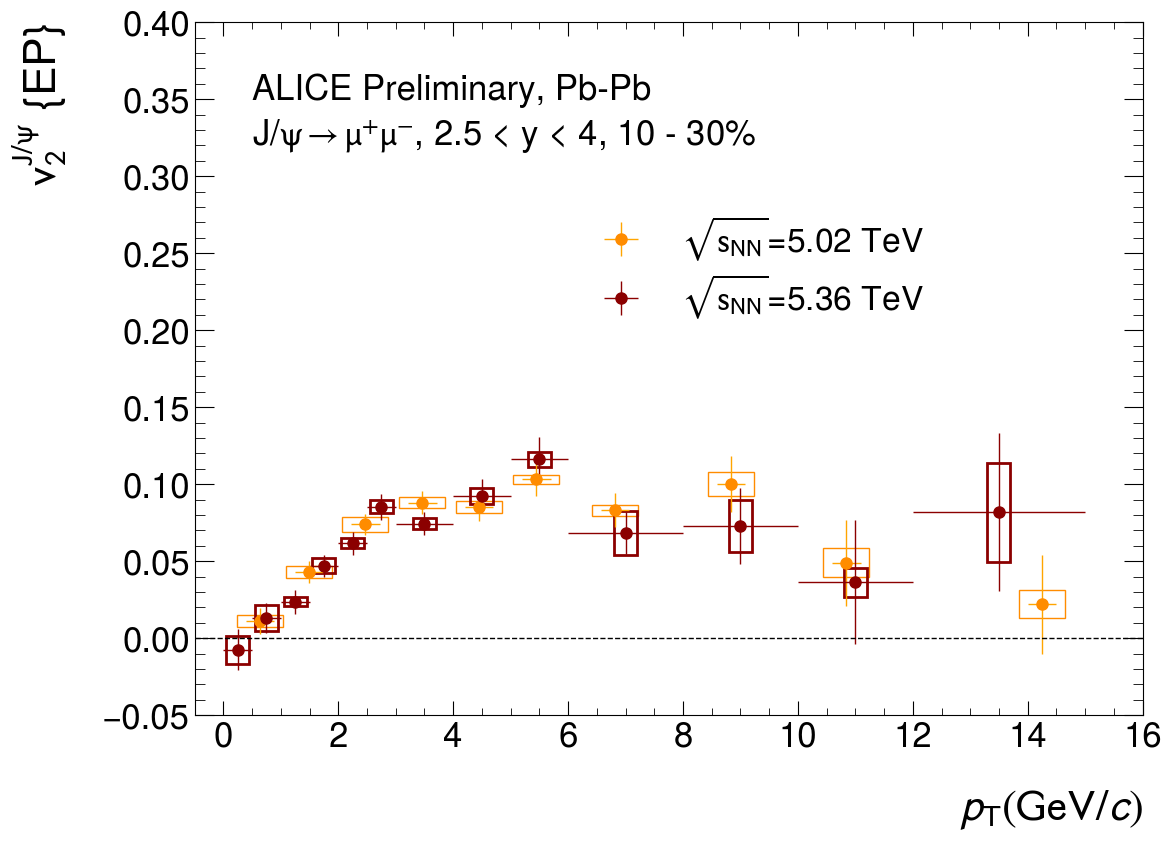

In [27]:
# 10-30%
dfV2JpsiVsPtCentr1030 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/pass4/v2_vs_pt_10_30.txt', sep=' ')
ptMinCentr1030 = dfV2JpsiVsPtCentr1030["x_min"]
ptMaxCentr1030 = dfV2JpsiVsPtCentr1030["x_max"]
ptCentr1030 = (ptMinCentr1030 + ptMaxCentr1030) / 2.
errPtCentr1030 = (ptMaxCentr1030 - ptMinCentr1030) / 2.
v2JpsiVsPtCentr1030 = dfV2JpsiVsPtCentr1030["val"]
statV2JpsiVsPtCentr1030 = dfV2JpsiVsPtCentr1030["stat"]
systV2JpsiVsPtCentr1030 = dfV2JpsiVsPtCentr1030["syst"]

# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_10_30, syst_v2_jpsi_run2_vs_pt_10_30, ax, 'darkorange', 1)
plot_syst(ptCentr1030, 0.2, v2JpsiVsPtCentr1030, systV2JpsiVsPtCentr1030, ax, 'darkred', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 16)
plt.ylim(-0.05, 0.40)
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_10_30, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_10_30, label=r'$\sqrt{s_{\rm{NN}}}$=5.02 TeV', fmt='o', color='darkorange', ecolor='orange')
plt.errorbar(ptCentr1030, v2JpsiVsPtCentr1030, xerr=errPtCentr1030, yerr=statV2JpsiVsPtCentr1030, label=r'$\sqrt{s_{\rm{NN}}}$=5.36 TeV', fmt='o', color='darkred', ecolor='darkred')
plt.legend(loc=(0.40, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'ALICE Preliminary, Pb-Pb', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 10 - 30%', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
#plt.gca().add_patch(box)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/pass4/v2_jpsi_vs_pt_centr_10_30_run2_vs_run3.pdf", format="pdf", bbox_inches="tight")
plt.show()

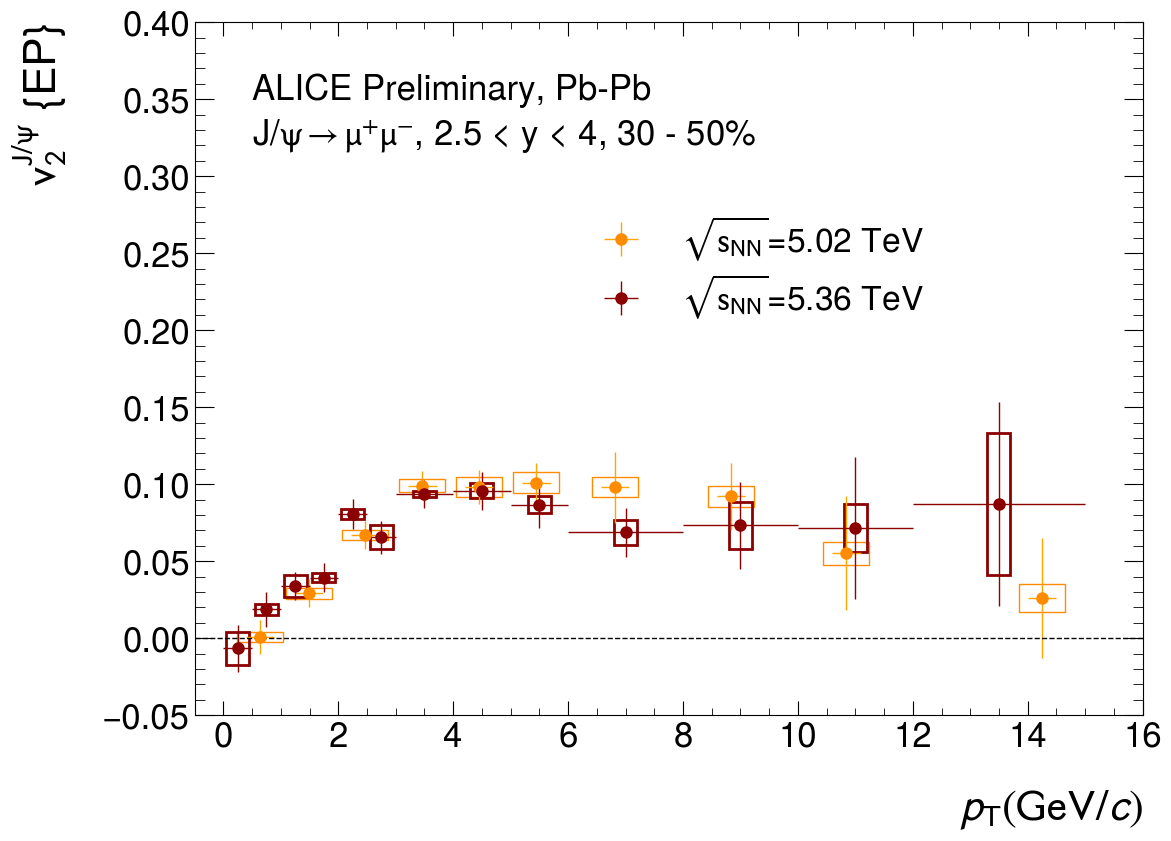

In [28]:
# 10-30%
dfV2JpsiVsPtCentr3050 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/pass4/v2_vs_pt_30_50.txt', sep=' ')
ptMinCentr3050 = dfV2JpsiVsPtCentr3050["x_min"]
ptMaxCentr3050 = dfV2JpsiVsPtCentr3050["x_max"]
ptCentr3050 = (ptMinCentr3050 + ptMaxCentr3050) / 2.
errPtCentr3050 = (ptMaxCentr3050 - ptMinCentr3050) / 2.
v2JpsiVsPtCentr3050 = dfV2JpsiVsPtCentr3050["val"]
statV2JpsiVsPtCentr3050 = dfV2JpsiVsPtCentr3050["stat"]
systV2JpsiVsPtCentr3050 = dfV2JpsiVsPtCentr3050["syst"]

# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_30_50, syst_v2_jpsi_run2_vs_pt_30_50, ax, 'darkorange', 1)
plot_syst(ptCentr3050, 0.2, v2JpsiVsPtCentr3050, systV2JpsiVsPtCentr3050, ax, 'darkred', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 16)
plt.ylim(-0.05, 0.40)
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_30_50, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_30_50, label=r'$\sqrt{s_{\rm{NN}}}$=5.02 TeV', fmt='o', color='darkorange', ecolor='orange')
plt.errorbar(ptCentr3050, v2JpsiVsPtCentr3050, xerr=errPtCentr3050, yerr=statV2JpsiVsPtCentr3050, label=r'$\sqrt{s_{\rm{NN}}}$=5.36 TeV', fmt='o', color='darkred', ecolor='darkred')
plt.legend(loc=(0.40, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'ALICE Preliminary, Pb-Pb', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 30 - 50%', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
#plt.gca().add_patch(box)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/pass4/v2_jpsi_vs_pt_centr_30_50_run2_vs_run3.pdf", format="pdf", bbox_inches="tight")
plt.show()

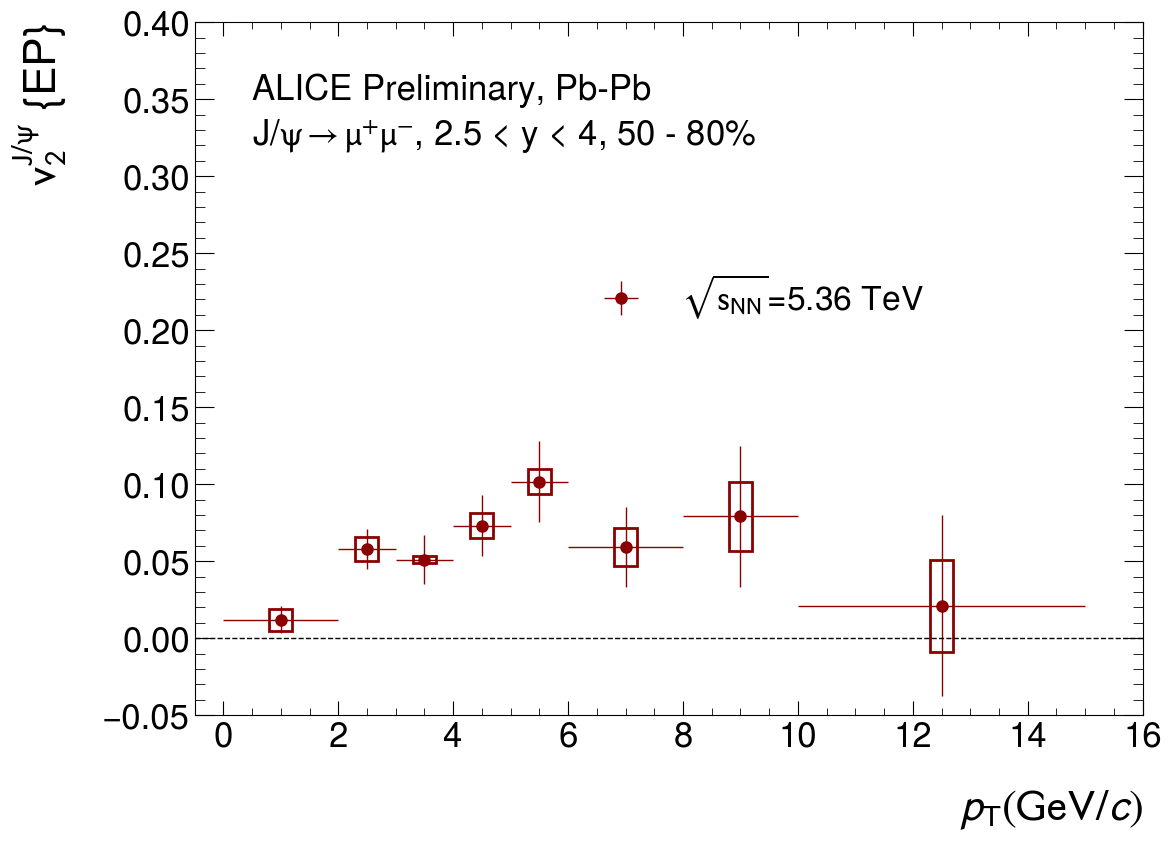

In [29]:
# 50-80%
dfV2JpsiVsPtCentr5080 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/pass4/v2_vs_pt_50_80.txt', sep=' ')
ptMinCentr5080 = dfV2JpsiVsPtCentr5080["x_min"]
ptMaxCentr5080 = dfV2JpsiVsPtCentr5080["x_max"]
ptCentr5080 = (ptMinCentr5080 + ptMaxCentr5080) / 2.
errPtCentr5080 = (ptMaxCentr5080 - ptMinCentr5080) / 2.
v2JpsiVsPtCentr5080 = dfV2JpsiVsPtCentr5080["val"]
statV2JpsiVsPtCentr5080 = dfV2JpsiVsPtCentr5080["stat"]
systV2JpsiVsPtCentr5080 = dfV2JpsiVsPtCentr5080["syst"]

# Creating histogram
fig, ax = plt.subplots()
plot_syst(ptCentr5080, 0.2, v2JpsiVsPtCentr5080, systV2JpsiVsPtCentr5080, ax, 'darkred', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 16)
plt.ylim(-0.05, 0.40)
plt.errorbar(ptCentr5080, v2JpsiVsPtCentr5080, xerr=errPtCentr5080, yerr=statV2JpsiVsPtCentr5080, label=r'$\sqrt{s_{\rm{NN}}}$=5.36 TeV', fmt='o', color='darkred', ecolor='darkred')
plt.legend(loc=(0.40, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'ALICE Preliminary, Pb-Pb', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 50 - 80%', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
#plt.gca().add_patch(box)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/pass4/v2_jpsi_vs_pt_centr_50_80_run2_vs_run3.pdf", format="pdf", bbox_inches="tight")
plt.show()

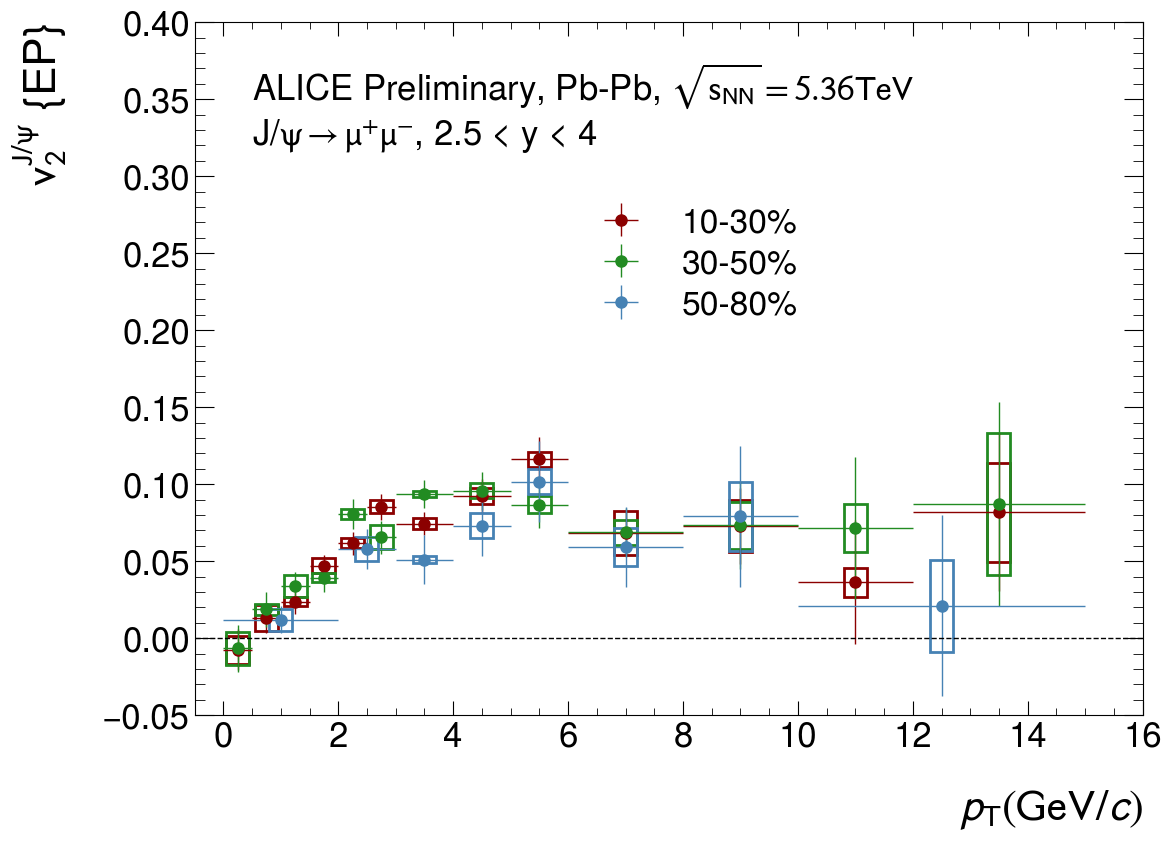

In [26]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(ptCentr1030, 0.2, v2JpsiVsPtCentr1030, systV2JpsiVsPtCentr1030, ax, 'darkred', 2)
plot_syst(ptCentr3050, 0.2, v2JpsiVsPtCentr3050, systV2JpsiVsPtCentr3050, ax, 'forestgreen', 2)
plot_syst(ptCentr5080, 0.2, v2JpsiVsPtCentr5080, systV2JpsiVsPtCentr5080, ax, 'steelblue', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 16)
plt.ylim(-0.05, 0.40)
plt.errorbar(ptCentr1030, v2JpsiVsPtCentr1030, xerr=errPtCentr1030, yerr=statV2JpsiVsPtCentr1030, label=r'10-30%', fmt='o', color='darkred', ecolor='darkred')
plt.errorbar(ptCentr3050, v2JpsiVsPtCentr3050, xerr=errPtCentr3050, yerr=statV2JpsiVsPtCentr3050, label=r'30-50%', fmt='o', color='forestgreen', ecolor='forestgreen')
plt.errorbar(ptCentr5080, v2JpsiVsPtCentr5080, xerr=errPtCentr5080, yerr=statV2JpsiVsPtCentr5080, label=r'50-80%', fmt='o', color='steelblue', ecolor='steelblue')
plt.legend(loc=(0.40, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'ALICE Preliminary, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
#plt.gca().add_patch(box)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/v2_jpsi_vs_pt_3_centralities_run3.pdf", format="pdf", bbox_inches="tight")
plt.show()

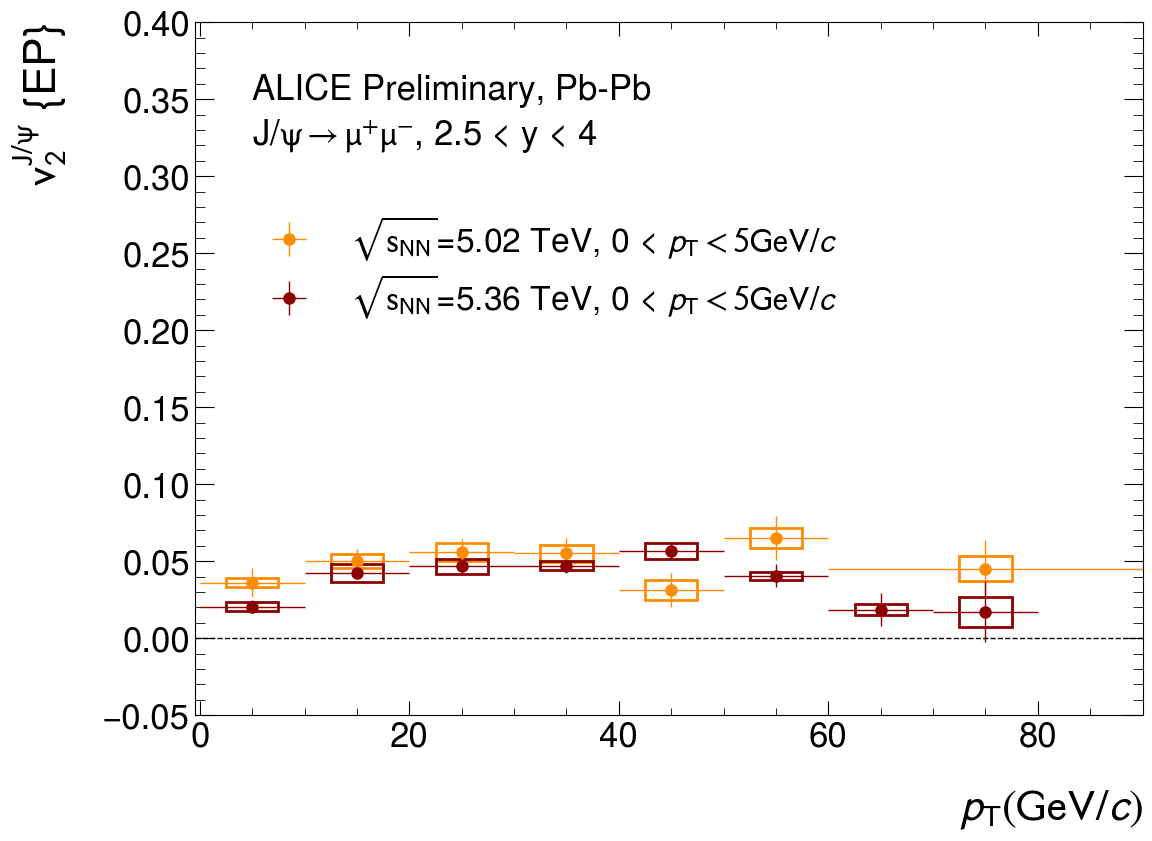

In [31]:
# 0 < pT < 5 GeV/c
dfV2JpsiVsCentrPt05 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/pass4/v2_vs_centr_0_5.txt', sep=' ')
cemtrMinPt05 = dfV2JpsiVsCentrPt05["x_min"]
centrMaxPt05 = dfV2JpsiVsCentrPt05["x_max"]
centrPt05 = (cemtrMinPt05 + centrMaxPt05) / 2.
errCentrPt05 = (centrMaxPt05 - cemtrMinPt05) / 2.
v2JpsiVsCentrPt05 = dfV2JpsiVsCentrPt05["val"]
statV2JpsiVsCentrPt05 = dfV2JpsiVsCentrPt05["stat"]
systV2JpsiVsCentrPt05 = dfV2JpsiVsCentrPt05["syst"]

dfV2JpsiVsCentrRun2Pt05 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/run2_v2_vs_centr_0_5.txt', sep=' ')
centrRun2Pt05 = dfV2JpsiVsCentrRun2Pt05["x"]
errCentrRun2Pt05 = dfV2JpsiVsCentrRun2Pt05["ex"]
v2JpsiVsCentrRun2Pt515 = dfV2JpsiVsCentrRun2Pt05["val"]
statV2JpsiVsCentrRun2Pt515 = dfV2JpsiVsCentrRun2Pt05["stat"]
systV2JpsiVsCentrRun2Pt515 = dfV2JpsiVsCentrRun2Pt05["syst"]

# Creating histogram
fig, ax = plt.subplots()
plot_syst(centrRun2Pt05, 2.5, v2JpsiVsCentrRun2Pt515, systV2JpsiVsCentrRun2Pt515, ax, 'darkorange', 2)
plot_syst(centrPt05, 2.5, v2JpsiVsCentrPt05, systV2JpsiVsCentrPt05, ax, 'darkred', 2)


plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 90)
plt.ylim(-0.05, 0.40)
plt.errorbar(centrRun2Pt05, v2JpsiVsCentrRun2Pt515, xerr=errCentrRun2Pt05, yerr=statV2JpsiVsCentrRun2Pt515, label=r'$\sqrt{s_{\rm{NN}}}$=5.02 TeV, 0 < $\it{p}_{\rm{T}} < 5 \rm{GeV}/\it{c}$', fmt='o', color='darkorange', ecolor='darkorange')
plt.errorbar(centrPt05, v2JpsiVsCentrPt05, xerr=errCentrPt05, yerr=statV2JpsiVsCentrPt05, label=r'$\sqrt{s_{\rm{NN}}}$=5.36 TeV, 0 < $\it{p}_{\rm{T}} < 5 \rm{GeV}/\it{c}$', fmt='o', color='darkred', ecolor='darkred')
plt.legend(loc=(0.05, 0.55), fontsize='xx-large')
plt.text(5.0, 0.35, r'ALICE Preliminary, Pb-Pb', fontsize=25)
plt.text(5.0, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
#plt.gca().add_patch(box)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/pass4/v2_jpsi_vs_centr_pt_0_5_run2_vs_run3.pdf", format="pdf", bbox_inches="tight")
plt.show()

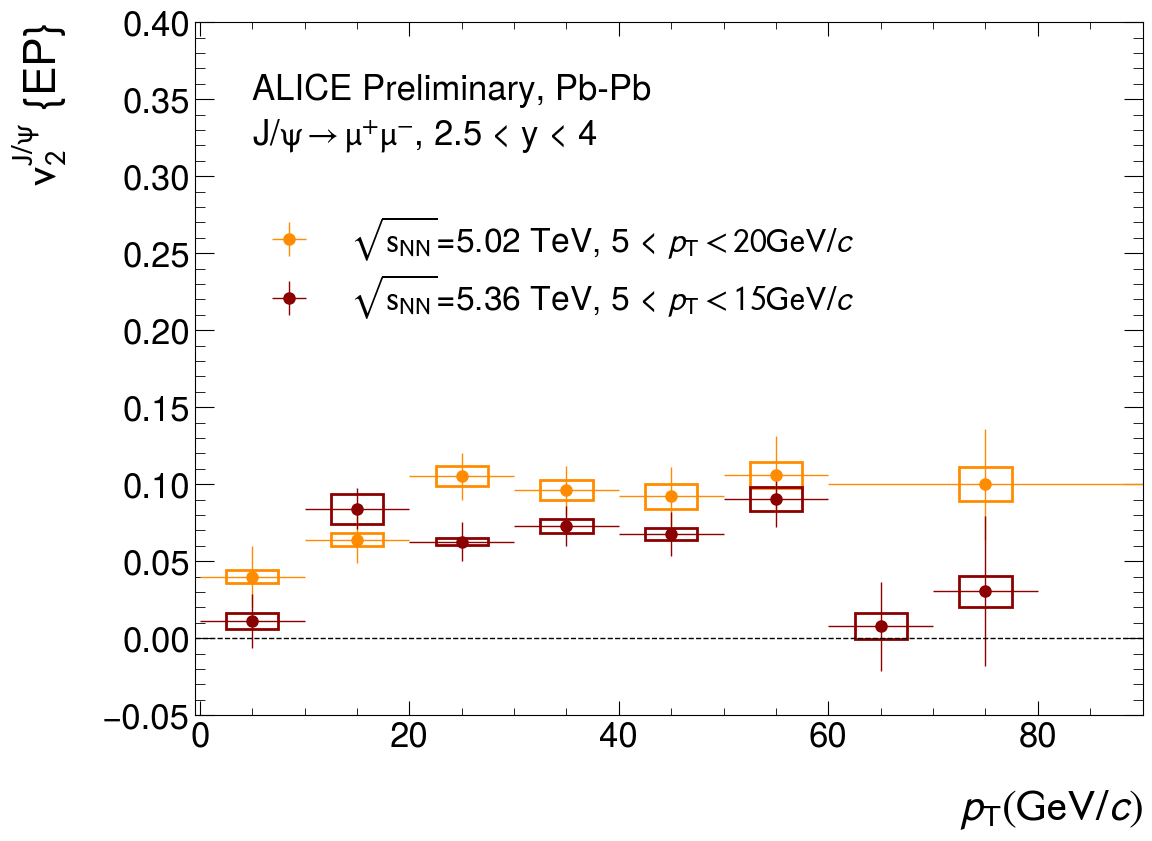

In [32]:
# 5 < pT < 15 GeV/c
dfV2JpsiVsCentrPt515 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/pass4/v2_vs_centr_5_15.txt', sep=' ')
centrMinPt515 = dfV2JpsiVsCentrPt515["x_min"]
centrMaxPt515 = dfV2JpsiVsCentrPt515["x_max"]
centrPt515 = (centrMinPt515 + centrMaxPt515) / 2.
errCentrPt515 = (centrMaxPt515 - centrMinPt515) / 2.
v2JpsiVsCentrPt515 = dfV2JpsiVsCentrPt515["val"]
statV2JpsiVsCentrPt515 = dfV2JpsiVsCentrPt515["stat"]
systV2JpsiVsCentrPt515 = dfV2JpsiVsCentrPt515["syst"]

dfV2JpsiVsCentrRun2Pt520 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/run2_v2_vs_centr_5_20.txt', sep=' ')
centrRun2Pt520 = dfV2JpsiVsCentrRun2Pt520["x"]
errCentrRun2Pt520 = dfV2JpsiVsCentrRun2Pt520["ex"]
v2JpsiVsCentrRun2Pt515 = dfV2JpsiVsCentrRun2Pt520["val"]
statV2JpsiVsCentrRun2Pt515 = dfV2JpsiVsCentrRun2Pt520["stat"]
systV2JpsiVsCentrRun2Pt515 = dfV2JpsiVsCentrRun2Pt520["syst"]

# Creating histogram
fig, ax = plt.subplots()
plot_syst(centrRun2Pt520, 2.5, v2JpsiVsCentrRun2Pt515, systV2JpsiVsCentrRun2Pt515, ax, 'darkorange', 2)
plot_syst(centrPt515, 2.5, v2JpsiVsCentrPt515, systV2JpsiVsCentrPt515, ax, 'darkred', 2)


plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 90)
plt.ylim(-0.05, 0.40)
plt.errorbar(centrRun2Pt520, v2JpsiVsCentrRun2Pt515, xerr=errCentrRun2Pt520, yerr=statV2JpsiVsCentrRun2Pt515, label=r'$\sqrt{s_{\rm{NN}}}$=5.02 TeV, 5 < $\it{p}_{\rm{T}} < 20 \rm{GeV}/\it{c}$', fmt='o', color='darkorange', ecolor='darkorange')
plt.errorbar(centrPt515, v2JpsiVsCentrPt515, xerr=errCentrPt515, yerr=statV2JpsiVsCentrPt515, label=r'$\sqrt{s_{\rm{NN}}}$=5.36 TeV, 5 < $\it{p}_{\rm{T}} < 15 \rm{GeV}/\it{c}$', fmt='o', color='darkred', ecolor='darkred')
plt.legend(loc=(0.05, 0.55), fontsize='xx-large')
plt.text(5.0, 0.35, r'ALICE Preliminary, Pb-Pb', fontsize=25)
plt.text(5.0, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
#plt.gca().add_patch(box)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/pass4/v2_jpsi_vs_centr_pt_5_15_run2_vs_run3.pdf", format="pdf", bbox_inches="tight")
plt.show()

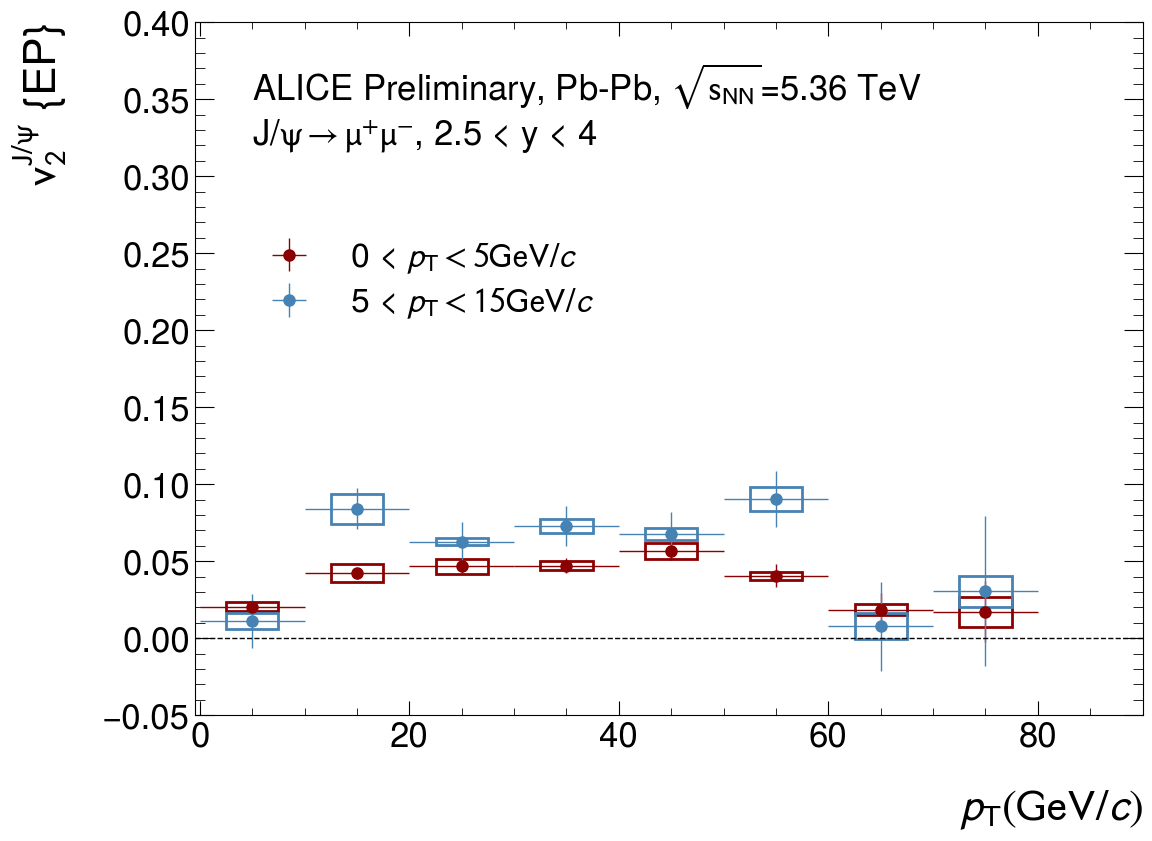

In [24]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(centrPt05, 2.5, v2JpsiVsCentrPt05, systV2JpsiVsCentrPt05, ax, 'darkred', 2)
plot_syst(centrPt515, 2.5, v2JpsiVsCentrPt515, systV2JpsiVsCentrPt515, ax, 'steelblue', 2)


plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 90)
plt.ylim(-0.05, 0.40)
plt.errorbar(centrPt05, v2JpsiVsCentrPt05, xerr=errCentrPt05, yerr=statV2JpsiVsCentrPt05, label=r'0 < $\it{p}_{\rm{T}} < 5 \rm{GeV}/\it{c}$', fmt='o', color='darkred', ecolor='darkred')
plt.errorbar(centrPt515, v2JpsiVsCentrPt515, xerr=errCentrPt515, yerr=statV2JpsiVsCentrPt515, label=r'5 < $\it{p}_{\rm{T}} < 15 \rm{GeV}/\it{c}$', fmt='o', color='steelblue', ecolor='steelblue')
plt.legend(loc=(0.05, 0.55), fontsize='xx-large')
plt.text(5.0, 0.35, r'ALICE Preliminary, Pb-Pb, $\sqrt{s_{\rm{NN}}}$=5.36 TeV', fontsize=25)
plt.text(5.0, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
#plt.gca().add_patch(box)
#plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/v2_jpsi_vs_pt_centr_50_80_run2_vs_run3.pdf", format="pdf", bbox_inches="tight")
plt.show()